# Exercise 10-3 Deep Learning with TensorFlow for Image Recognition

## Task
Create a neural network to recognize an image. 
## Data
Use a training dataset from (https://github.com/zalandoresearch/fashion-mnist).

Each image is represented in a matrix of (28 x 28) pixels, __784__ in total. <br>
Each pixel has a value between 0 and 1.

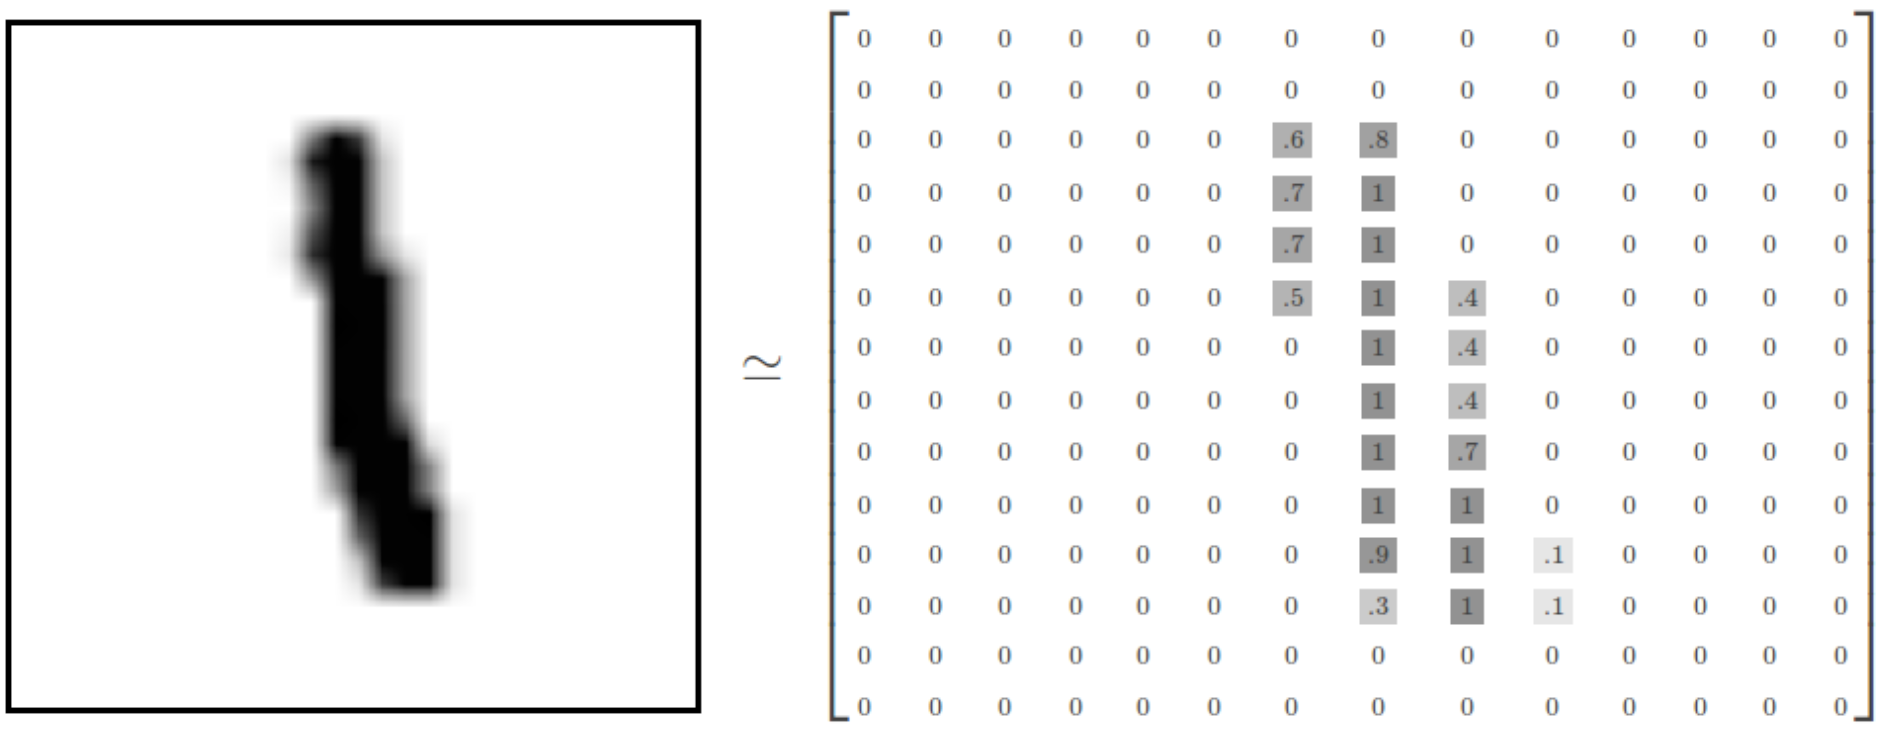

## Terminology
### Learning rate
Defines how fast the network learns.
The lower the value for learning rate, the slower learning, and the more likely getting better results.
The higher the learning rate, the quicker learning, giving faster training times, but may suffer on the results. 
### Epoch
Feeding the network is called __feed-forward__.
Adjusting the weights backwards is called __backpropagation__.
Feed-forward and back-propagation go in cycles.
A cycle is called __epoch__.

After each epoch runs on the train data, hopefully, the weights are tunned better, the error is lower, and the accuracy is highet.
After all epochs, we can test the model using the test set.

## Solution
Create a neural network with input layer, three hidden layers, and an output layer.
Use __activation function__ to fire neurons.
Use __cost function__ to estimate the error.
Use __optimizer function__ to minimize the error.

Pixel Processing
<div style="width: 500px;">!["Explanation of data"]("../images/mnist_1layer.png" "Pixel Processing")</div>

## Algorithm
input layer >> weights >> hidden layer 1 >> activation function >> hidden layer 2 >> activation function >> weights >> output layer
compare (output, expected output) with a cost/lost function
optimizer -> minimize the error
back propagatoion
epochs

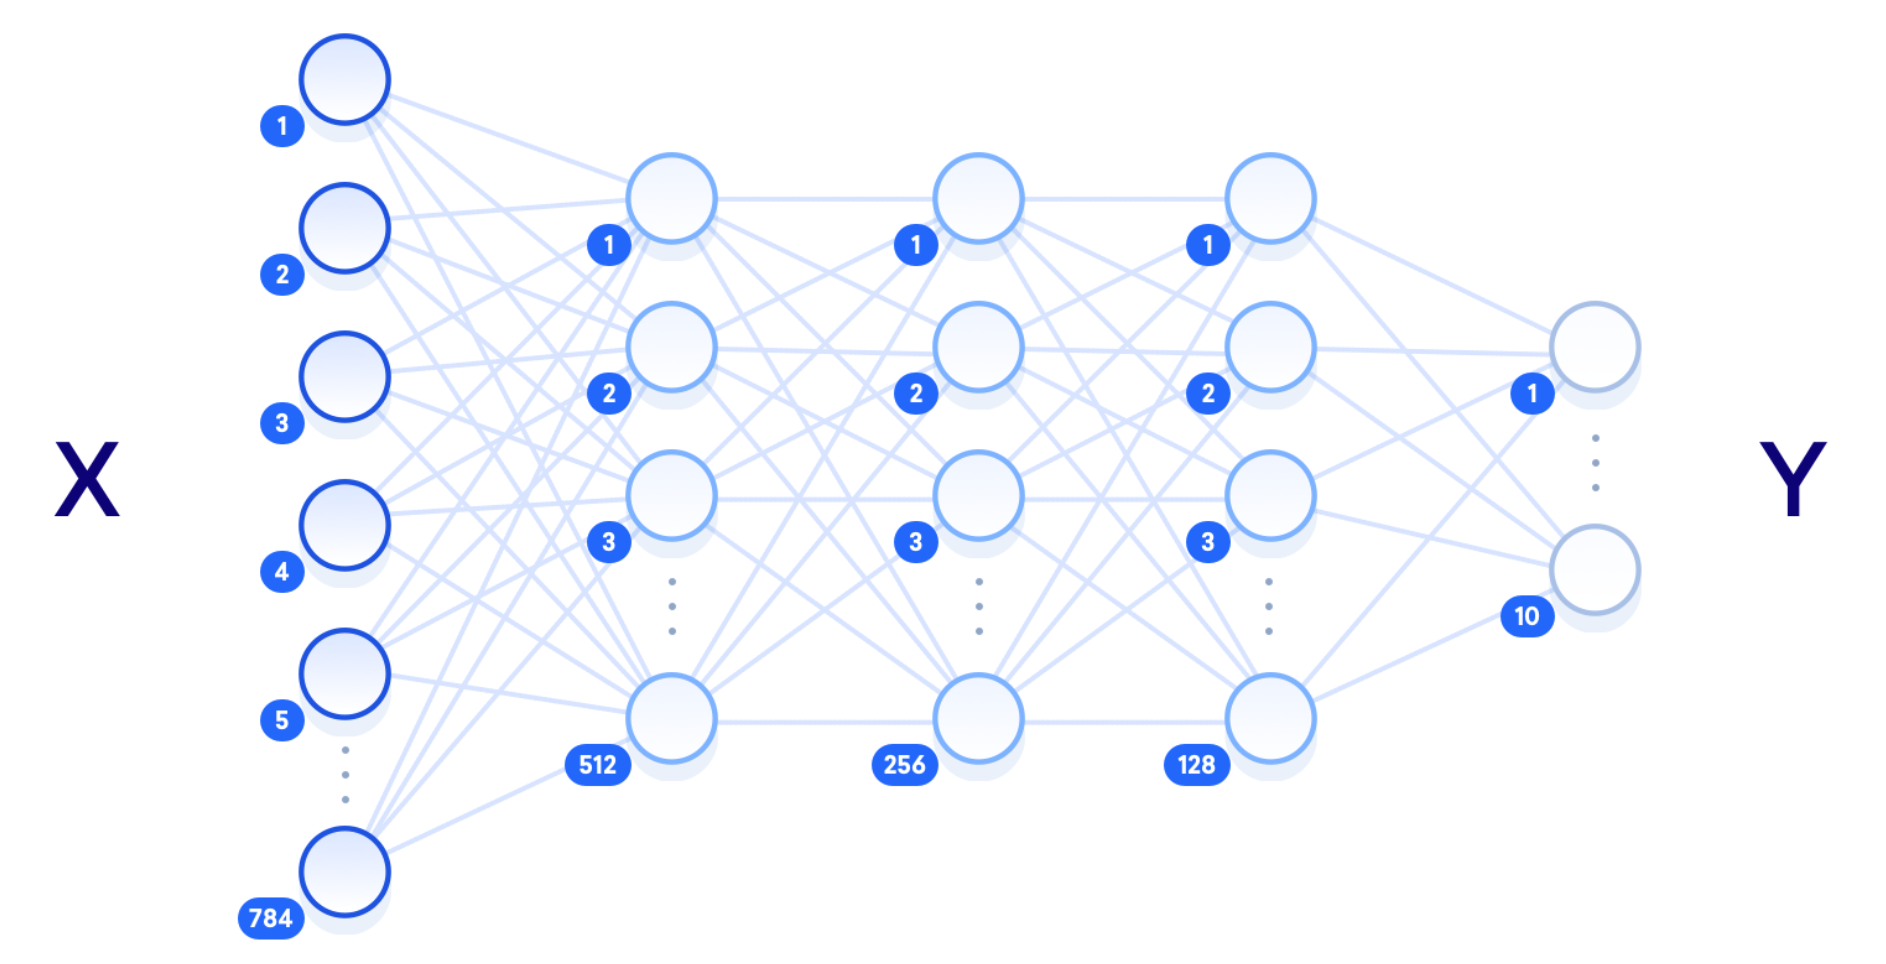

### One-hot Encoding
One hot encoding is a process by which categorical variables are converted into a set of binary digits, where
the position of '1' determines the category. We will use it for representing the labels.

one_hot=True means

0 = [1,0,0,0,0,0,0,0,0] <br>
1 = [0,1,0,0,0,0,0,0,0] <br>
2 = [0,0,1,0,0,0,0,0,0] <br>
3 = [0,0,0,1,0,0,0,0,0] <br>
...

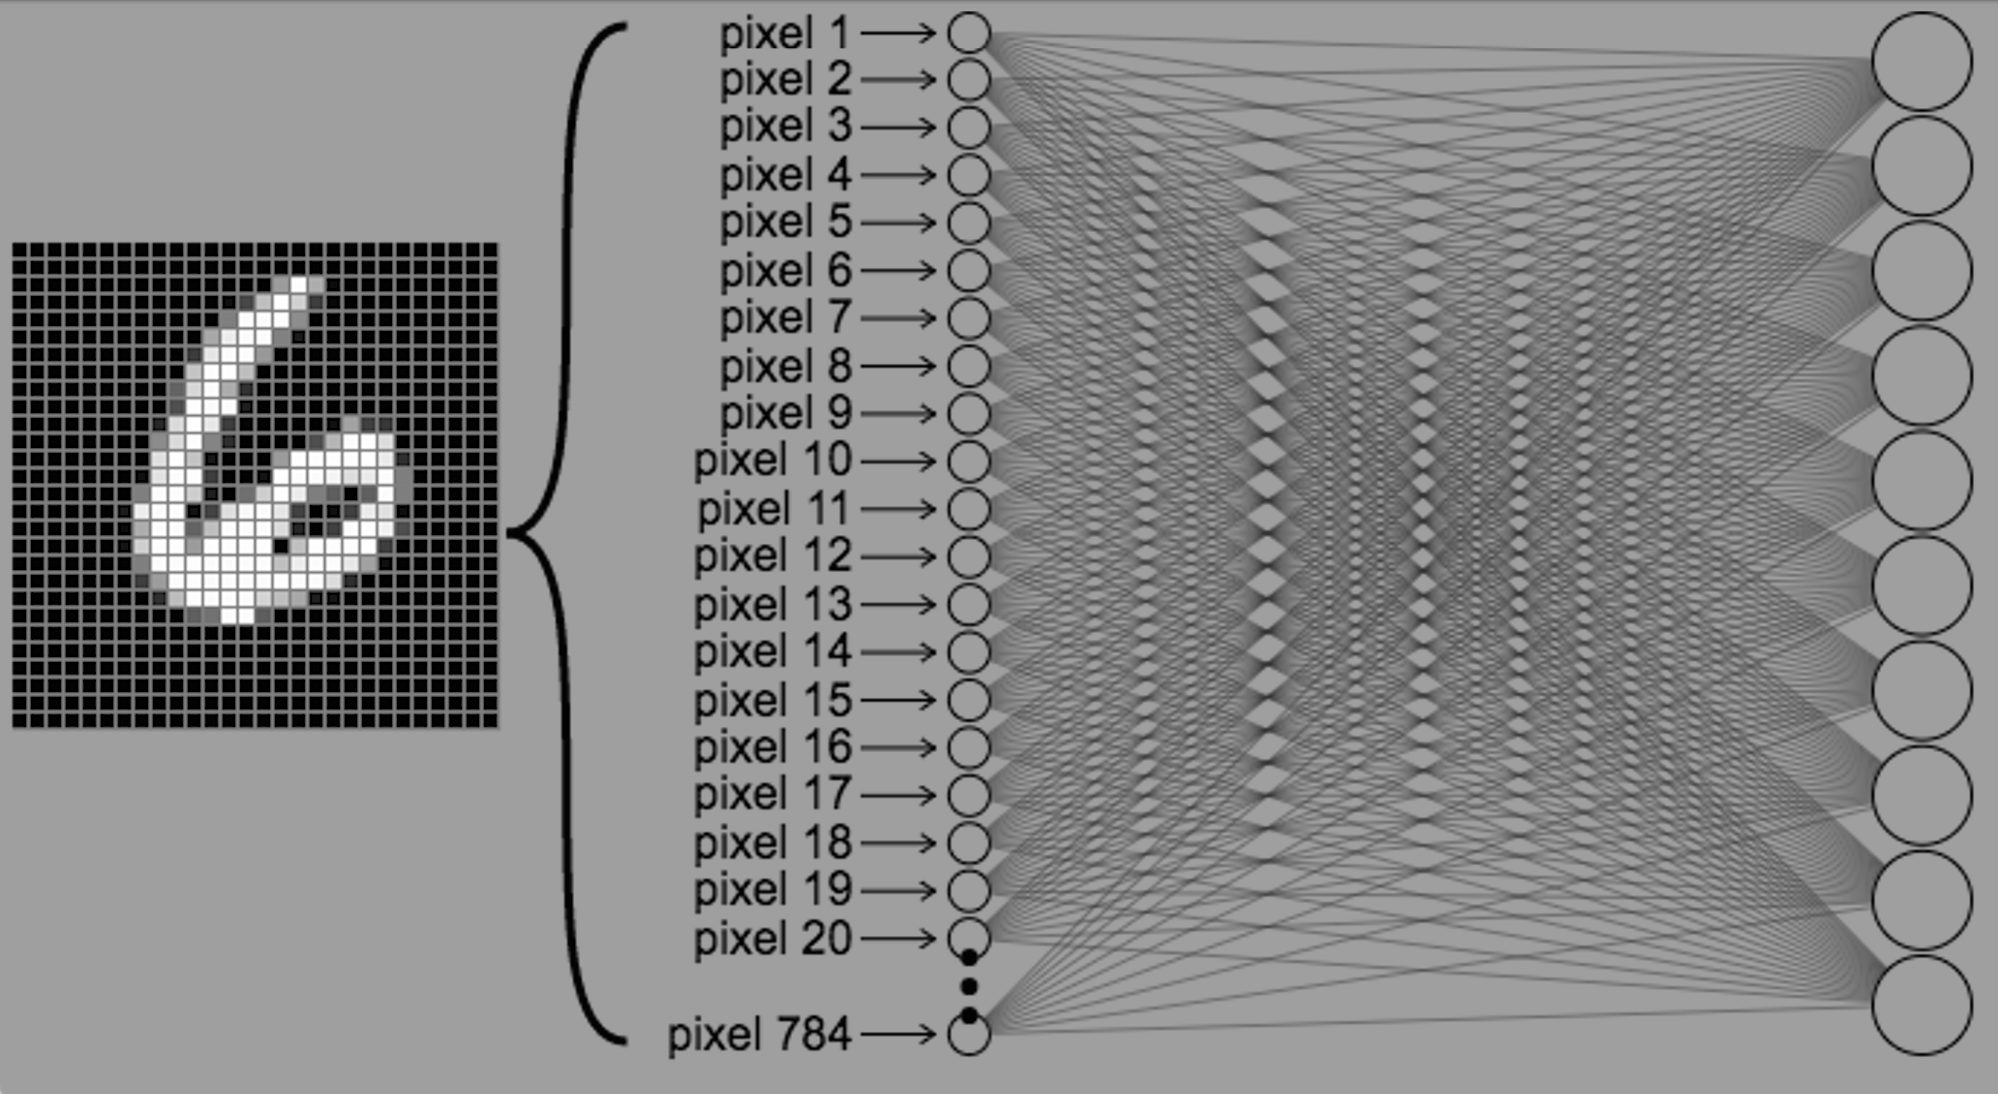

## Code

In [1]:
import tensorflow as tf
import numpy as np
import random as ran
import matplotlib.pyplot as plt

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [2]:
# Get the input data from tensorflow.examples.tutorials.mnist import input_data
from tensorflow.examples.tutorials.mnist import input_data
# data = input_data.read_data_sets("../../data/Fashion/", one_hot=True) 
data = input_data.read_data_sets("../../data/Mnist/", one_hot=True)
# one-hot used for the labels
# data = input_data.read_data_sets('data/fashion', source_url='http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/')

ModuleNotFoundError: No module named 'tensorflow.examples'

In [ ]:
# Number of samples
n = data.train.num_examples
print(n)

In [ ]:
# Training set
def train_set(n):
    print ('Images data:  ' + str(data.train.images.shape))
    x_train = data.train.images[:n,:]
    print ('x_train data: ' + str(x_train.shape))
    y_train = data.train.labels[:n,:]
    print ('y_train data: ' + str(y_train.shape))
    return x_train, y_train

x_train, y_train = train_set(n)

In [ ]:
# Test set
def test_set(n):
    print ('Images data: ' + str(data.test.images.shape))
    x_test = data.test.images[:n,:]
    print ('x_test data: ' + str(x_test.shape))
    y_test = data.test.labels[:n,:]
    print ('y_test data: ' + str(y_test.shape))
    return x_test, y_test

x_test, y_test = test_set(n)

In [ ]:
# Test plot to see an image
def display_image(num):
    print(y_train[num])
    label = y_train[num].argmax(axis=0)
    image = x_train[num].reshape([28,28])
    plt.title('Example: %d  Label: %d' % (num, label))
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    plt.grid()
    plt.show()

In [ ]:
# Try it
display_image(39879)

### Define the model

In [ ]:
# As the data is too much for one training, split in mini-batches (partitions)
# Using small batches of random data is called stochastic training 
batch_size = 100

# Number of batches
m = int(n/batch_size)

### Network Topology

In [ ]:
# Three hidden layers
# Number of nodes in each hidden layer
nodes_hl1 = 600
nodes_hl2 = 500
nodes_hl3 = 400

In [ ]:
# Number of classes in output layer
classes = 10

# Number of epochs
epochs = 15

# Learning rate
lr = 0.001

### Tensors

In [ ]:
# Array placeholders for input and output data
# needed, as we do not know the size of one mini-batch, it will be determined automatically
x = tf.placeholder('float', [None, 784])
y = tf.placeholder('float', [None, 10])

### TF Computation Graph

In [ ]:
def build_graph(x):
    # Assign random values to weights and biases at each hidden layer, as well as at the output layer
        
    # first hidden layer    
    hl1 = {'w':tf.Variable(tf.random_normal([784, nodes_hl1])),
           'b':tf.Variable(tf.random_normal([nodes_hl1]))}
    # second hidden layer
    hl2 = {'w':tf.Variable(tf.random_normal([nodes_hl1, nodes_hl2])),
           'b':tf.Variable(tf.random_normal([nodes_hl2]))}
    # third hidden layer
    hl3 = {'w':tf.Variable(tf.random_normal([nodes_hl2, nodes_hl3])),
           'b':tf.Variable(tf.random_normal([nodes_hl3]))}
    # output 
    out = {'w':tf.Variable(tf.random_normal([nodes_hl3, classes])),
           'b':tf.Variable(tf.random_normal([classes]))}

    # Start feed forward
    # y = {X} * {W} + b
    # tf.matmul() - a function for multiplication of matrices
    # relu - the activation function for a node (see the graph below)
    # softmax() - alternative activation function, applied to the output nodes
    l1 = tf.matmul(x,hl1['w'])
    l1 = tf.add(l1, hl1['b'])
    l1 = tf.nn.relu(l1)

    l2 = tf.matmul(l1,hl2['w'])
    l2 = tf.add(l2, hl2['b'])
    l2 = tf.nn.relu(l2)

    l3 = tf.add(tf.matmul(l2,hl3['w']), hl3['b'])
    l3 = tf.nn.relu(l3)

    output = tf.matmul(l3,out['w']) + out['b']

    return output

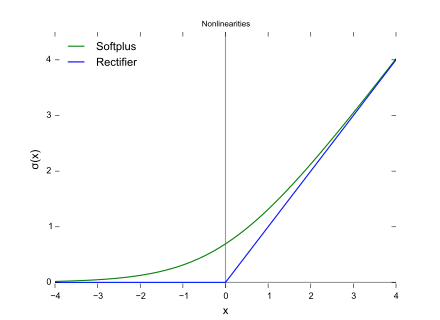


                                                Activation Function

In [ ]:
build_graph(x)

In [ ]:
# Validation function - will be used during the training
def validate(predicted, expected):
    correct = tf.equal(tf.argmax(predicted, 1), tf.argmax(expected, 1))
    accuracy = tf.reduce_mean(tf.cast(correct, 'float'))
    print('Accuracy:',accuracy.eval({x:data.test.images, y:data.test.labels}))   

### Training Session

In [443]:
# Training process set up will run in a TensorFlow Session
def train(x):
    print(x)
    # Start iteration of prediction using the computation graph above
    prediction = build_graph(x)
    
    # estimate the error/cost/loss 
    # based on the probability that the classes are mutually exclusive, so labels are informative
    
    # cost has the value we try to minimize by manipulating the weights
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=prediction, labels=y) )
    
    # minimise the cost by optimization function
    optimizer = tf.train.AdamOptimizer().minimize(cost)
    
    # Create session    
    with tf.Session() as sess:
        # initialize the variables we created
        sess.run(tf.global_variables_initializer())   
        
        # start iterations for each epoch
        for epoch in range(epochs):
            epoch_loss = 0
            # same for each batch (partition of our data)
            for _ in range(m):
                # get the next batch of random data of size n
                epoch_x, epoch_y = data.train.next_batch(batch_size)
                # feeding the placeholders for x and y
                _, c = sess.run([optimizer, cost], feed_dict={x: epoch_x, y: epoch_y})
                epoch_loss += c

            print('Epoch ', epoch, ' out of ', epochs,'completed,  loss:', epoch_loss)
            
            #Validate the accuracy
            validate(prediction, y)
          

In [444]:
# Run 
train(x)

Tensor("Placeholder_24:0", shape=(?, 784), dtype=float32)
Epoch  0  out of  15 completed,  loss: 1545265.1717529297
Accuracy: 0.9007
Epoch  1  out of  15 completed,  loss: 402524.64416217804
Accuracy: 0.9303
Epoch  2  out of  15 completed,  loss: 218607.96774566174
Accuracy: 0.9372
Epoch  3  out of  15 completed,  loss: 129078.50972986221
Accuracy: 0.9411
Epoch  4  out of  15 completed,  loss: 75794.19405955967
Accuracy: 0.9424
Epoch  5  out of  15 completed,  loss: 52355.28665381417
Accuracy: 0.9436
Epoch  6  out of  15 completed,  loss: 34495.22536278516
Accuracy: 0.949
Epoch  7  out of  15 completed,  loss: 26473.272977578767
Accuracy: 0.9473
Epoch  8  out of  15 completed,  loss: 21591.120870277286
Accuracy: 0.9517
Epoch  9  out of  15 completed,  loss: 18820.348475068808
Accuracy: 0.9533
Epoch  10  out of  15 completed,  loss: 18526.221415311098
Accuracy: 0.956
Epoch  11  out of  15 completed,  loss: 15731.725271677598
Accuracy: 0.9573
Epoch  12  out of  15 completed,  loss: 15086

### Testing

In [500]:
# Try a random image from the database
K = ran.randint(0, 9999) 

# Load one of the training examples - K
x_test = data.test.images[K,:].reshape(1,784)
y_test = data.test.labels[K,:].reshape(1, 10)

In [501]:
print(y_test)

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


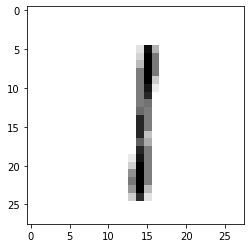

In [502]:
# Plot image K
img = data.test.images[K]
plt.imshow(img.reshape(28, 28), cmap=plt.cm.binary)
plt.show()

In [503]:
data.test.images[K,:].shape

(784,)

In [504]:
print(data.test.images[K,:])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

### Validation

In [505]:
sess = tf.Session()
prediction = sess.run(tf.argmax(y_test, 1), feed_dict={x: [img]})
print(y_test)
print('Neural Network predicted', prediction[0])
print('Real label is:', np.argmax(data.test.labels[K]))

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
Neural Network predicted 1
Real label is: 1


### Validate with My Image

In [522]:
# My image
from PIL import Image
from PIL import ImageOps 
from matplotlib.pyplot import imshow
%matplotlib inline

# img = image.load_img("../images/my3.png", target_size=(28, 28))
img = Image.open("../images/my3.png") 

In [523]:
# Resize my image
img = img.resize((28,28))
img = img.convert("L") # "L" means 8-bit pixels, black and white
img = ImageOps.invert(img) # the original is white on black background

# convert the image into array of pixels
img_to_arr = np.array(img)

In [524]:
img_to_arr.shape

(28, 28)

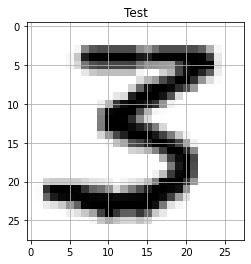

In [525]:
# plot the array
plt.title('Test')
plt.imshow(img_to_arr, cmap=plt.cm.binary, interpolation='nearest')
plt.grid()
plt.show()

In [526]:
print(img.size, img.format)

(28, 28) None


In [516]:
# To resize an image, if necessary
from PIL import Image
def resize_image(input_image, output_image, size):
    original_image = Image.open(input_image)
    width, height = original_image.size
    print('The original image size is {wide} wide x {height} high'.format(wide=width, height=height))
 
    resized_image = original_image.resize(size)
    width, height = resized_image.size
    print('The resized image size is {wide} wide x {height} high'.format(wide=width, height=height))
    
    # resized_image.show()
    resized_image.save(output_image)

In [541]:
# resize the original image
resize_image("../images/my3.png", "../images/my3z.png", [28,28])

The original image size is 412 wide x 456 high
The resized image size is 28 wide x 28 high


In [548]:
# placeholders for my input and output
# None means undefined number of images
my_x = tf.placeholder('float', [None, 784])
my_y = tf.placeholder('float', [None, 10])

In [551]:
my_x = img_to_arr.reshape(784,)
my_y = [[0]*10]
my_x = my_x / 255.0

In [552]:
sess = tf.Session()
prediction = sess.run(tf.argmax([my_y], 1), feed_dict={x: [my_x]})
print(my_y)


[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]


In [553]:
print('Neural Network predicted', prediction[0])
print('Real label is:', 3)

Neural Network predicted [0 0 0 0 0 0 0 0 0 0]
Real label is: 3


## Your Task 
Create a deep learning model of neural network to recognize hand-written icons. Use Fashon as a training and test set.